<a href="https://colab.research.google.com/github/PriyamVR/deep-ai-project-/blob/main/updated_group_3_projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

label_path = "/content/drive/MyDrive/guntunk/Labels"
for file_name in os.listdir(label_path):
    if file_name.endswith(".txt"):
        with open(os.path.join(label_path, file_name), 'r') as f:

            print(f"File: {file_name}")
            print(f.read())


File: 317.txt
1
211 89 295 131

File: 50.txt
1
102 27 179 60

File: 47.txt
2
111 40 136 67
194 101 227 135

File: 14.txt
1
128 58 181 110

File: 111.txt
2
9 58 58 140
77 65 127 134

File: 63.txt
2
205 12 223 25
188 15 209 27

File: 42.txt
1
36 27 85 62

File: 143.txt
1
164 32 226 62

File: 159.txt
2
69 64 137 88
169 64 238 89

File: 282.txt
1
207 87 297 136

File: 169.txt
1
119 83 247 133

File: 319.txt
2
143 35 271 101
12 94 105 139

File: 83.txt
1
9 7 227 165

File: 23.txt
1
34 28 95 79

File: 244.txt
1
94 60 178 128

File: 178.txt
1
113 47 251 94

File: 179.txt
1
180 84 247 127

File: 238.txt
1
70 57 194 113

File: 166.txt
1
11 101 200 145

File: 58.txt
1
109 60 193 92

File: 122.txt
2
21 38 50 82
101 35 135 63

File: 278.txt
1
37 17 142 176

File: 283.txt
1
173 67 240 124

File: 197.txt
1
73 54 151 98

File: 210.txt
1
148 25 252 101

File: 130.txt
1
45 141 124 207

File: 69.txt
1
45 45 94 146

File: 298.txt
1
117 19 342 107

File: 151.txt
1
75 74 162 103

File: 180.txt
3
22 102 288

In [ ]:
import os

label_path = "/content/drive/MyDrive/guntunk/Labels"
img_width = 1920  # ইমেজের প্রস্থ
img_height = 1080  # ইমেজের উচ্চতা

for file_name in os.listdir(label_path):
    if file_name.endswith(".txt"):
        file_path = os.path.join(label_path, file_name)
        with open(file_path, 'r') as f:
            lines = f.readlines()

        # ক্লাস আইডি ও বাউন্ডিং বক্স আলাদা করা
        class_id = lines[0].strip()
        bbox = list(map(int, lines[1].strip().split()))

        x_min, y_min, x_max, y_max = bbox

        # YOLO ফরম্যাটে রূপান্তর
        x_center = (x_min + x_max) / (2 * img_width)
        y_center = (y_min + y_max) / (2 * img_height)
        width = (x_max - x_min) / img_width
        height = (y_max - y_min) / img_height

        # নতুন ফরম্যাট তৈরি
        yolo_format = f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n"

        # নতুন ফরম্যাট ফাইলে সংরক্ষণ
        with open(file_path, 'w') as f:
            f.write(yolo_format)

        print(f"Updated: {file_name} -> {yolo_format.strip()}")


Updated: 317.txt -> 1 0.131771 0.101852 0.043750 0.038889
Updated: 50.txt -> 1 0.073177 0.040278 0.040104 0.030556
Updated: 47.txt -> 2 0.064323 0.049537 0.013021 0.025000
Updated: 14.txt -> 1 0.080469 0.077778 0.027604 0.048148
Updated: 111.txt -> 2 0.017448 0.091667 0.025521 0.075926
Updated: 63.txt -> 2 0.111458 0.017130 0.009375 0.012037
Updated: 42.txt -> 1 0.031510 0.041204 0.025521 0.032407
Updated: 143.txt -> 1 0.101562 0.043519 0.032292 0.027778
Updated: 159.txt -> 2 0.053646 0.070370 0.035417 0.022222
Updated: 282.txt -> 1 0.131250 0.103241 0.046875 0.045370
Updated: 169.txt -> 1 0.095312 0.100000 0.066667 0.046296
Updated: 319.txt -> 2 0.107813 0.062963 0.066667 0.061111
Updated: 83.txt -> 1 0.061458 0.079630 0.113542 0.146296
Updated: 23.txt -> 1 0.033594 0.049537 0.031771 0.047222
Updated: 244.txt -> 1 0.070833 0.087037 0.043750 0.062963
Updated: 178.txt -> 1 0.094792 0.065278 0.071875 0.043519
Updated: 179.txt -> 1 0.111198 0.097685 0.034896 0.039815
Updated: 238.txt -> 1

In [ ]:
!wget https://raw.githubusercontent.com/AlexeyAB/darknet/master/cfg/yolov3.cfg -O yolov3.cfg

--2025-01-29 10:07:02--  https://raw.githubusercontent.com/AlexeyAB/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      

2025-01-29 10:07:03 (56.8 MB/s) - ‘yolov3.cfg’ saved [8342/8342]



In [ ]:
import os

label_path = "/content/drive/MyDrive/guntunk/Labels"  # লেবেলের অবস্থান
valid_classes = {'1', '2'}  # শুধুমাত্র যেসব ক্লাস রাখবেন

for file_name in os.listdir(label_path):
    if file_name.endswith(".txt"):
        file_path = os.path.join(label_path, file_name)

        with open(file_path, 'r') as f:
            lines = f.readlines()

        filtered_lines = []
        for line in lines:
            parts = line.strip().split()
            class_id = parts[0]  # ক্লাস আইডি আলাদা করা
            if class_id in valid_classes:
                filtered_lines.append(line)

        # নতুন ফরম্যাট অনুযায়ী ফাইল আপডেট
        with open(file_path, 'w') as f:
            f.writelines(filtered_lines)

        print(f"Updated: {file_name}, Remaining Entries: {len(filtered_lines)}")

Updated: 317.txt, Remaining Entries: 1
Updated: 50.txt, Remaining Entries: 1
Updated: 47.txt, Remaining Entries: 1
Updated: 14.txt, Remaining Entries: 1
Updated: 111.txt, Remaining Entries: 1
Updated: 63.txt, Remaining Entries: 1
Updated: 42.txt, Remaining Entries: 1
Updated: 143.txt, Remaining Entries: 1
Updated: 159.txt, Remaining Entries: 1
Updated: 282.txt, Remaining Entries: 1
Updated: 169.txt, Remaining Entries: 1
Updated: 319.txt, Remaining Entries: 1
Updated: 83.txt, Remaining Entries: 1
Updated: 23.txt, Remaining Entries: 1
Updated: 244.txt, Remaining Entries: 1
Updated: 178.txt, Remaining Entries: 1
Updated: 179.txt, Remaining Entries: 1
Updated: 238.txt, Remaining Entries: 1
Updated: 166.txt, Remaining Entries: 1
Updated: 58.txt, Remaining Entries: 1
Updated: 122.txt, Remaining Entries: 1
Updated: 278.txt, Remaining Entries: 1
Updated: 283.txt, Remaining Entries: 1
Updated: 197.txt, Remaining Entries: 1
Updated: 210.txt, Remaining Entries: 1
Updated: 130.txt, Remaining Entri

In [ ]:
import os

label_path = "/content/drive/MyDrive/guntunk/Labels"  # লেবেলের অবস্থান

# শুধুমাত্র 1 এবং 2 ক্লাস অনুমোদিত, এবং তাদেরকে 0, 1 এ পরিবর্তন করতে হবে
class_mapping = {'1': '0', '2': '1'}

for file_name in os.listdir(label_path):
    if file_name.endswith(".txt"):
        file_path = os.path.join(label_path, file_name)

        with open(file_path, 'r') as f:
            lines = f.readlines()

        updated_lines = []
        for line in lines:
            parts = line.strip().split()
            class_id = parts[0]
            if class_id in class_mapping:
                parts[0] = class_mapping[class_id]  # ক্লাস আইডি আপডেট
                updated_line = " ".join(parts)  # নতুন লাইন তৈরি
                updated_lines.append(updated_line + "\n")

        # নতুন ফরম্যাট অনুযায়ী ফাইল আপডেট
        with open(file_path, 'w') as f:
            f.writelines(updated_lines)

        print(f"Updated: {file_name}, Remaining Entries: {len(updated_lines)}")

print("Class ID mapping and cleanup completed successfully!")


Updated: 317.txt, Remaining Entries: 1
Updated: 50.txt, Remaining Entries: 1
Updated: 47.txt, Remaining Entries: 1
Updated: 14.txt, Remaining Entries: 1
Updated: 111.txt, Remaining Entries: 1
Updated: 63.txt, Remaining Entries: 1
Updated: 42.txt, Remaining Entries: 1
Updated: 143.txt, Remaining Entries: 1
Updated: 159.txt, Remaining Entries: 1
Updated: 282.txt, Remaining Entries: 1
Updated: 169.txt, Remaining Entries: 1
Updated: 319.txt, Remaining Entries: 1
Updated: 83.txt, Remaining Entries: 1
Updated: 23.txt, Remaining Entries: 1
Updated: 244.txt, Remaining Entries: 1
Updated: 178.txt, Remaining Entries: 1
Updated: 179.txt, Remaining Entries: 1
Updated: 238.txt, Remaining Entries: 1
Updated: 166.txt, Remaining Entries: 1
Updated: 58.txt, Remaining Entries: 1
Updated: 122.txt, Remaining Entries: 1
Updated: 278.txt, Remaining Entries: 1
Updated: 283.txt, Remaining Entries: 1
Updated: 197.txt, Remaining Entries: 1
Updated: 210.txt, Remaining Entries: 1
Updated: 130.txt, Remaining Entri

In [ ]:
from PIL import Image
import os

image_path = "/content/drive/MyDrive/guntunk/Images"
for file in os.listdir(image_path):
    if file.endswith(".png") or file.endswith(".jpeg"):  # .png বা .jpeg ফাইল
        img = Image.open(os.path.join(image_path, file))
        file_name = os.path.splitext(file)[0] + ".jpg"
        img.convert("RGB").save(os.path.join(image_path, file_name))
        os.remove(os.path.join(image_path, file))  # আগের ফাইল ডিলিট করুন

print("Conversion complete!")

Conversion complete!


In [ ]:
import os
import random
import shutil

# ডেটাসেট লোকেশন
image_dir = "/content/drive/MyDrive/guntunk/Images"
label_dir = "/content/drive/MyDrive/guntunk/Labels"

# নতুন ফোল্ডার তৈরি
split_dir = "/content/drive/MyDrive/guntunk/split_data"
os.makedirs(split_dir, exist_ok=True)

for split in ['train', 'val', 'test']:
    os.makedirs(os.path.join(split_dir, split, 'images'), exist_ok=True)
    os.makedirs(os.path.join(split_dir, split, 'labels'), exist_ok=True)

# ইমেজ এবং লেবেল ফাইল লোড
image_files = [f for f in os.listdir(image_dir) if f.endswith(".jpg")]
random.shuffle(image_files)

# স্প্লিট রেশিও সেট (Train: 70%, Val: 15%, Test: 15%)
train_size = int(0.70 * len(image_files))
val_size = int(0.15 * len(image_files))

train_files = image_files[:train_size]
val_files = image_files[train_size:train_size + val_size]
test_files = image_files[train_size + val_size:]

# ফাইল গুলোর ট্রেনিং, ভ্যালিডেশন ও টেস্ট সেটে স্থানান্তর
def move_files(files, split):
    for file in files:
        shutil.move(os.path.join(image_dir, file), os.path.join(split_dir, split, 'images', file))
        label_file = os.path.splitext(file)[0] + ".txt"
        shutil.move(os.path.join(label_dir, label_file), os.path.join(split_dir, split, 'labels', label_file))

move_files(train_files, 'train')
move_files(val_files, 'val')
move_files(test_files, 'test')

print("Dataset split complete!")


Dataset split complete!


In [ ]:
train_path = "/content/drive/MyDrive/guntunk/split_data/train/images"
val_path = "/content/drive/MyDrive/guntunk/split_data/val/images"
test_path = "/content/drive/MyDrive/guntunk/split_data/test/images"

print("Train images:", len([f for f in os.listdir(train_path) if f.endswith(".jpg")]))
print("Validation images:", len([f for f in os.listdir(val_path) if f.endswith(".jpg")]))
print("Test images:", len([f for f in os.listdir(test_path) if f.endswith(".jpg")]))


Train images: 233
Validation images: 49
Test images: 51


In [ ]:
yolo_config = """
train: /content/drive/MyDrive/guntunk/split_data/train/images
val: /content/drive/MyDrive/guntunk/split_data/val/images

nc: 2  # মোট ক্লাস সংখ্যা
names: ['gun_single', 'gun_double']  # ক্লাসের নাম
"""

# yolo.yaml ফাইল সংরক্ষণ
with open("/content/drive/MyDrive/guntunk/yolo.yaml", "w") as file:
    file.write(yolo_config)

print("yolo.yaml configuration file created successfully!")


yolo.yaml configuration file created successfully!


In [ ]:
# cfg ফাইল লোড করুন
cfg_path = "yolov3.cfg"

# প্রয়োজনীয় পরিবর্তনগুলো করার জন্য Python দিয়ে লাইন সম্পাদনা
with open(cfg_path, "r") as file:
    lines = file.readlines()

# cfg ফাইল কাস্টমাইজেশন
with open(cfg_path, "w") as file:
    for line in lines:
        # classes = 2
        if "classes=" in line:
            line = "classes=2\n"
        # filters = 21 (filters = (classes + 5) * 3)
        if "filters=" in line and line.strip()[-1].isdigit():
            line = "filters=21\n"
        # batch এবং subdivisions পরিবর্তন
        if "batch=" in line:
            line = "batch=64\n"
        if "subdivisions=" in line:
            line = "subdivisions=16\n"
        file.write(line)


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.6/914.6 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov3.pt')  # Pre-trained YOLOv3 Model

results = model.train(
    data="/content/drive/MyDrive/guntunk/yolo.yaml",
    epochs=10,
    imgsz=320,
    batch=4,  # ব্যাচ সাইজ কমানো হয়েছে
    device='cpu'  # GPU এর বদলে CPU তে চালানো
)

print("Training Complete!")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
PRO TIP 💡 Replace 'model=yolov3.pt' with new 'model=yolov3u.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 198M/198M [00:00<00:00, 313MB/s]


Ultralytics 8.3.69 🚀 Python-3.11.11 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov3.pt, data=/content/drive/MyDrive/guntunk/yolo.yaml, epochs=10, time=None, patience=100, batch=4, imgsz=320, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sh

100%|██████████| 755k/755k [00:00<00:00, 85.3MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 1]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     37056  ultralytics.nn.modules.block.Bottleneck      [64, 64]                      
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    295680  ultralytics.nn.modules.block.Bottleneck      [128, 128]                    
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  8   4724736  ultralytics.nn.modules.block.Bottleneck      [256, 256]                    
  7                  -1  1   1180672  ultralytics

train: Scanning /content/drive/MyDrive/guntunk/split_data/train/labels... 233 images, 9 backgrounds, 0 corrupt: 100%|██████████| 233/233 [00:02<00:00, 92.84it/s] 


train: New cache created: /content/drive/MyDrive/guntunk/split_data/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/guntunk/split_data/val/labels... 49 images, 1 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<00:00, 101.96it/s]


val: New cache created: /content/drive/MyDrive/guntunk/split_data/val/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 84 weight(decay=0.0), 91 weight(decay=0.0005), 90 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      2.462      7.601     0.9244          1        320: 100%|██████████| 59/59 [19:04<00:00, 19.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:00<00:00,  8.71s/it]

                   all         49         48   9.29e-05     0.0122   2.87e-05   8.35e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      3.298       4.45      1.219          0        320: 100%|██████████| 59/59 [18:36<00:00, 18.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:02<00:00,  8.96s/it]

                   all         49         48    0.00017      0.061   0.000131   1.67e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      2.897      3.251      1.041          1        320: 100%|██████████| 59/59 [18:30<00:00, 18.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:01<00:00,  8.77s/it]

                   all         49         48   0.000355      0.061   0.000226   5.49e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      3.176      3.367      1.136          1        320: 100%|██████████| 59/59 [18:30<00:00, 18.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:01<00:00,  8.72s/it]

                   all         49         48   4.46e-05     0.0122   1.79e-05   3.59e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      3.054      3.072      1.116          1        320: 100%|██████████| 59/59 [18:30<00:00, 18.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:00<00:00,  8.64s/it]

                   all         49         48   7.05e-05     0.0122    3.7e-05    3.7e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      3.173      3.076      1.165          1        320: 100%|██████████| 59/59 [18:35<00:00, 18.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:59<00:00,  8.53s/it]

                   all         49         48   0.000456     0.0122   0.000236   9.44e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      3.467      3.317      1.188          1        320: 100%|██████████| 59/59 [18:34<00:00, 18.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:59<00:00,  8.52s/it]

                   all         49         48   0.000456     0.0122   0.000236   9.44e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G       3.39      3.222      1.154          1        320: 100%|██████████| 59/59 [18:29<00:00, 18.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:59<00:00,  8.55s/it]

                   all         49         48   0.000402      0.061   0.000257   6.69e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      3.025      2.868      1.001          1        320: 100%|██████████| 59/59 [18:31<00:00, 18.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:59<00:00,  8.47s/it]

                   all         49         48    0.00058     0.0854   0.000354   7.65e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      3.285      3.085      1.113          1        320: 100%|██████████| 59/59 [18:30<00:00, 18.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:59<00:00,  8.54s/it]

                   all         49         48   0.000428     0.0488   0.000243   6.98e-05



10 epochs completed in 3.316 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 207.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 207.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.69 🚀 Python-3.11.11 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv3 summary (fused): 226 layers, 103,665,782 parameters, 0 gradients, 282.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:59<00:00,  8.43s/it]

                   all         49         48   0.000428     0.0488   0.000243   6.98e-05
            gun_single         41         41   0.000856     0.0976   0.000486    0.00014
            gun_double          7          7          0          0          0          0


Speed: 0.5ms preprocess, 1191.7ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs/detect/train
Training Complete!


In [ ]:
from google.colab import drive
import shutil

# Google Drive মাউন্ট করুন
drive.mount('/content/drive')

# সেভ লোকেশন নির্ধারণ করুন
source_path = "/content/runs/detect/train/weights/best.pt"  # এখানে আপনার YOLO ট্রেনিংয়ের সঠিক path দিন
destination_path = "/content/drive/MyDrive/guntunk/training_results/best.pt"  # Google Drive-এ যেখানে সেভ করতে চান

# ফাইল কপি করুন
shutil.copy(source_path, destination_path)

print("Model saved successfully in Google Drive!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model saved successfully in Google Drive!


In [ ]:
from google.colab import drive
import shutil

# Google Drive মাউন্ট করুন
drive.mount('/content/drive')

# ফাইল কপি করার জন্য সোর্স এবং ডেস্টিনেশন লোকেশন নির্ধারণ করুন
source_path_best = "/content/runs/detect/train/weights/best.pt"
destination_path_best = "/content/drive/MyDrive/guntunk/training_results/best.pt"

source_path_last = "/content/runs/detect/train/weights/last.pt"
destination_path_last = "/content/drive/MyDrive/guntunk/training_results/last.pt"

# ফাইল কপি করুন
shutil.copy(source_path_best, destination_path_best)
shutil.copy(source_path_last, destination_path_last)

print("Both best.pt and last.pt saved successfully in Google Drive!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Both best.pt and last.pt saved successfully in Google Drive!


In [ ]:
from google.colab import drive
import shutil

drive.mount('/content/drive')

# পুরো ট্রেনিং ফল্ডার Google Drive-এ কপি করুন
shutil.copytree("/content/runs/detect/train", "/content/drive/MyDrive/guntunk/training_results/train")

print("Training results including graphs copied successfully!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Training results including graphs copied successfully!


In [ ]:
from google.colab import files
files.download('/content/drive/MyDrive/guntunk/training_results/train/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
import shutil
import os

# Google Drive মাউন্ট করুন
drive.mount('/content/drive')

# লোকেশন নির্ধারণ করুন
source_folder = "/content/runs/detect/train"
destination_folder = "/content/drive/MyDrive/guntunk/training_results"

# গন্তব্য ফোল্ডার তৈরি করুন (যদি না থাকে)
os.makedirs(destination_folder, exist_ok=True)

# শুধুমাত্র মিসিং ফাইলগুলোর তালিকা
files_to_save = [
    "args.yaml",
    "labels.jpg",
    "results.png",
    "confusion_matrix.npy",
    "results.csv",
    "events.out.tfevents.1"  # TensorBoard লগ ফাইল
]

# train_batchX.jpg ফাইলগুলো যোগ করুন
batch_files = [f for f in os.listdir(source_folder) if f.startswith("train_batch") and f.endswith(".jpg")]
files_to_save.extend(batch_files)

# নির্দিষ্ট ফাইলগুলো Google Drive-এ কপি করুন
for file_name in files_to_save:
    src_path = os.path.join(source_folder, file_name)
    dest_path = os.path.join(destination_folder, file_name)

    if os.path.exists(src_path):  # ফাইল আছে কিনা চেক করুন
        shutil.copy(src_path, dest_path)
        print(f"✅ Saved: {file_name}")
    else:
        print(f"⚠️ Warning: {file_name} not found, skipping...")

print("\n🎯 All missing training files have been saved successfully in Google Drive!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Saved: args.yaml
✅ Saved: labels.jpg
✅ Saved: results.png
⚠️ Warning: confusion_matrix.npy not found, skipping...
✅ Saved: results.csv
⚠️ Warning: events.out.tfevents.1 not found, skipping...
✅ Saved: train_batch0.jpg
✅ Saved: train_batch2.jpg
✅ Saved: train_batch1.jpg

🎯 All missing training files have been saved successfully in Google Drive!


In [ ]:
from google.colab import drive
import shutil
import os

# Google Drive মাউন্ট করুন
drive.mount('/content/drive')

# লোকেশন নির্ধারণ করুন
source_folder = "/content/runs/detect/train"
destination_folder = "/content/drive/MyDrive/guntunk/training_results"

# গন্তব্য ফোল্ডার তৈরি করুন (যদি না থাকে)
os.makedirs(destination_folder, exist_ok=True)

# সংরক্ষণযোগ্য ফাইলের তালিকা
files_to_save = [
    "args.yaml",
    "labels.jpg",
    "results.png",
    "confusion_matrix.npy",
    "results.csv",
    "events.out.tfevents"  # TensorBoard লগ ফাইল
]

# train_batchX.jpg ফাইলগুলো যোগ করুন
batch_files = [f for f in os.listdir(source_folder) if f.startswith("train_batch") and f.endswith(".jpg")]
files_to_save.extend(batch_files)

# নির্দিষ্ট ফাইলগুলো Google Drive-এ কপি করুন
for file_name in files_to_save:
    src_path = os.path.join(source_folder, file_name)
    dest_path = os.path.join(destination_folder, file_name)

    if os.path.exists(src_path):  # ফাইল আছে কিনা চেক করুন
        shutil.copy(src_path, dest_path)
        print(f"✅ Saved: {file_name}")
    else:
        print(f"⚠️ Warning: {file_name} not found, skipping...")

print("\n🎯 All missing training files have been saved successfully in Google Drive!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Saved: args.yaml
✅ Saved: labels.jpg
✅ Saved: results.png
⚠️ Warning: confusion_matrix.npy not found, skipping...
✅ Saved: results.csv
⚠️ Warning: events.out.tfevents not found, skipping...
✅ Saved: train_batch0.jpg
✅ Saved: train_batch2.jpg
✅ Saved: train_batch1.jpg

🎯 All missing training files have been saved successfully in Google Drive!


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

image 1/1 /content/drive/MyDrive/guntunk/split_data/test/images/80.jpg: 480x640 (no detections), 5734.9ms
Speed: 23.4ms preprocess, 5734.9ms inference, 14.7ms postprocess per image at shape (1, 3, 480, 640)


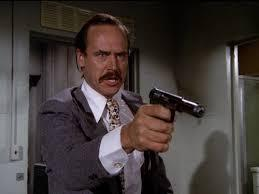

In [ ]:
from ultralytics import YOLO

# মডেল লোড করুন
model = YOLO('/content/drive/MyDrive/guntunk/training_results/train/weights/best.pt')

# # Confidence Threshold কমিয়ে দিন
# results = model('/content/drive/MyDrive/guntunk/split_data/test/images/80.jpg', conf=0.25, verbose=True)

results = model('/content/drive/MyDrive/guntunk/split_data/test/images/80.jpg', conf=0.1, imgsz=640)

results[0].show()




image 1/51 /content/drive/MyDrive/guntunk/split_data/test/images/10.jpg: 320x192 (no detections), 882.9ms
image 2/51 /content/drive/MyDrive/guntunk/split_data/test/images/104.jpg: 192x320 (no detections), 948.1ms
image 3/51 /content/drive/MyDrive/guntunk/split_data/test/images/105.jpg: 192x320 (no detections), 843.4ms
image 4/51 /content/drive/MyDrive/guntunk/split_data/test/images/122.jpg: 224x320 (no detections), 973.5ms
image 5/51 /content/drive/MyDrive/guntunk/split_data/test/images/125.jpg: 160x320 (no detections), 734.6ms
image 6/51 /content/drive/MyDrive/guntunk/split_data/test/images/127.jpg: 320x224 (no detections), 1022.9ms
image 7/51 /content/drive/MyDrive/guntunk/split_data/test/images/13.jpg: 192x320 (no detections), 971.1ms
image 8/51 /content/drive/MyDrive/guntunk/split_data/test/images/135.jpg: 192x320 (no detections), 1285.7ms
image 9/51 /content/drive/MyDrive/guntunk/split_data/test/images/140.jpg: 192x320 (no detections), 1314.2ms
image 10/51 /content/drive/MyDrive/

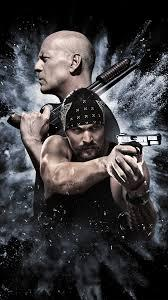

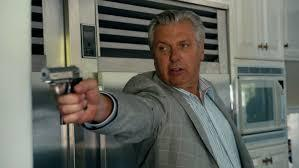

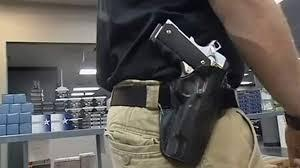

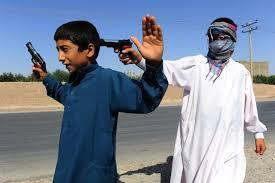

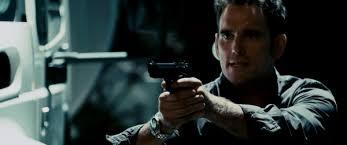

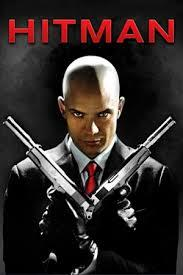

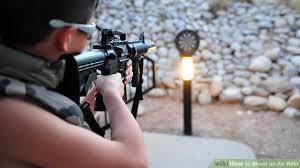

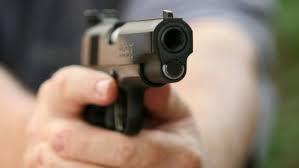

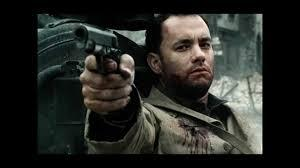

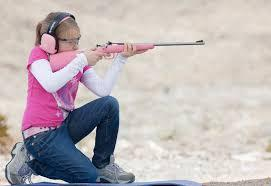

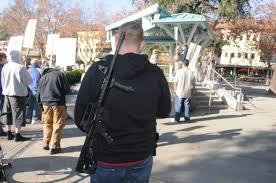

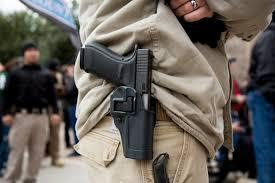

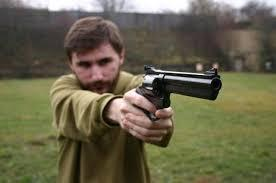

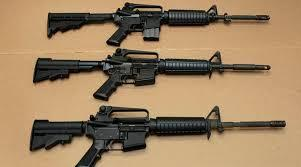

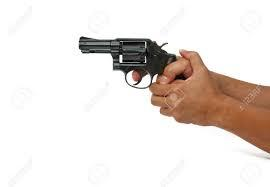

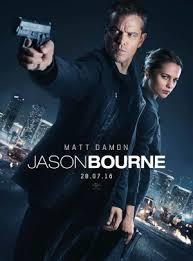

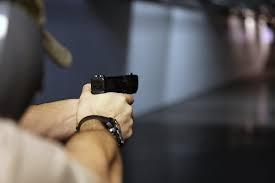

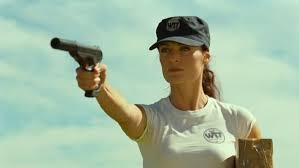

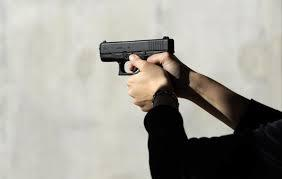

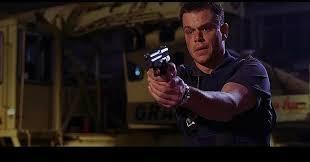

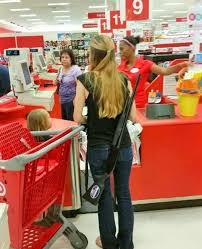

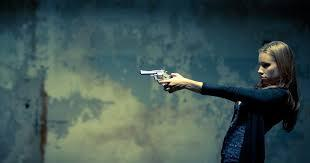

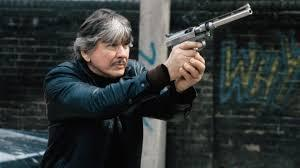

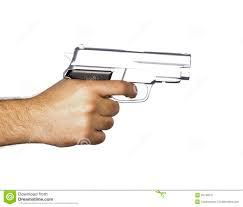

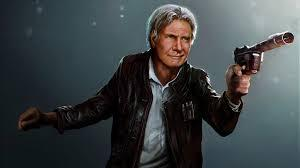

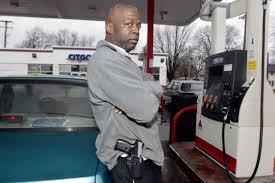

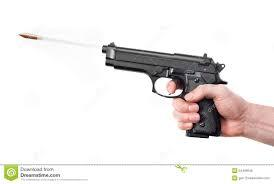

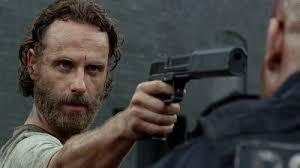

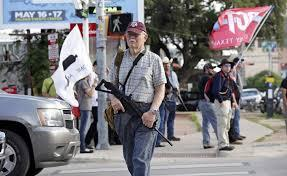

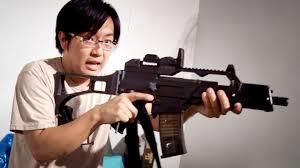

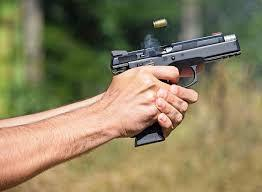

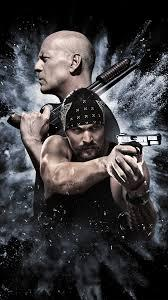

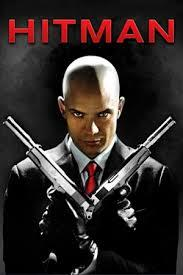

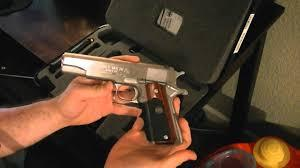

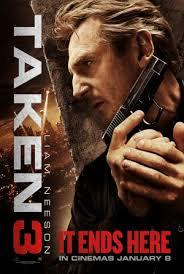

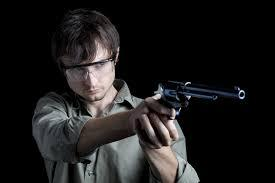

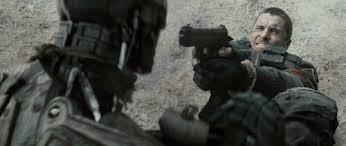

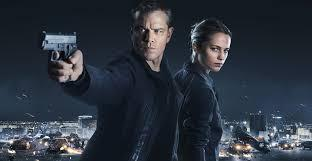

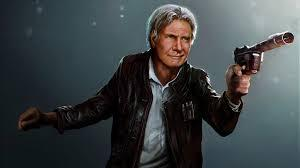

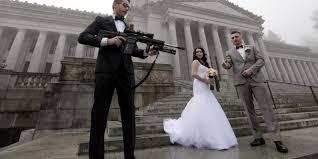

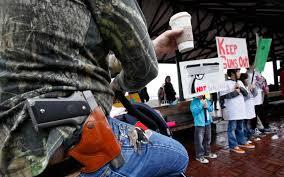

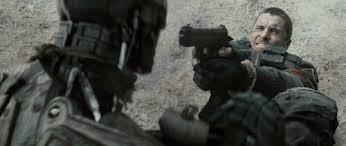

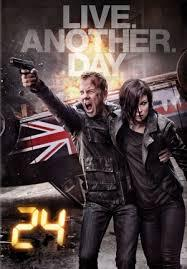

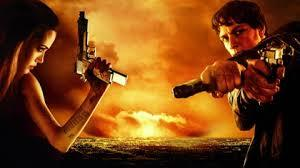

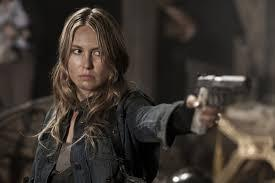

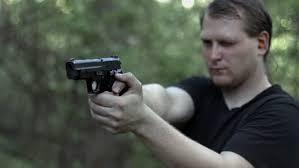

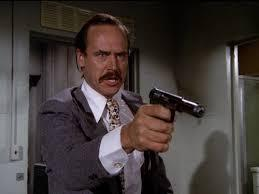

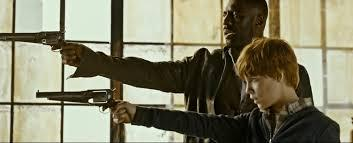

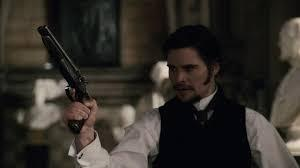

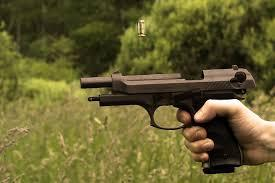

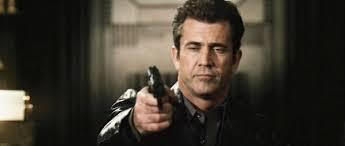

In [ ]:
from ultralytics import YOLO

# 🔹 YOLO Model লোড করো
model = YOLO('/content/drive/MyDrive/guntunk/training_results/train/weights/best.pt')

# 🔹 নতুন ছবি বা ভিডিওতে Inference চালাও
results = model('/content/drive/MyDrive/guntunk/split_data/test/images/', conf=0.25)

# 🔹 Prediction দেখাও
for result in results:
    result.show()


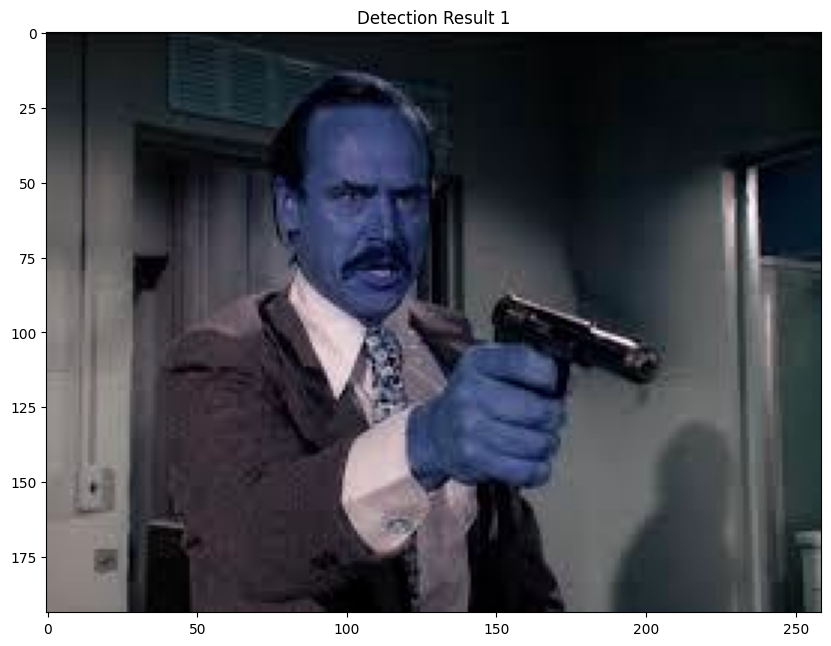

In [ ]:
# মডেলের ভেতরের ফিচার ম্যাপ দেখুন
import matplotlib.pyplot as plt

for i, r in enumerate(results):
    plt.figure(figsize=(10,10))
    plt.imshow(r.orig_img)
    plt.title(f"Detection Result {i+1}")
    plt.show()


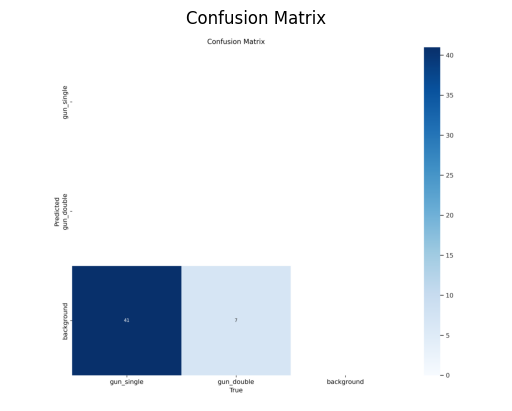

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Confusion matrix image load
img = cv2.imread("/content/drive/MyDrive/guntunk/training_results/train/confusion_matrix.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Confusion Matrix")
plt.show()


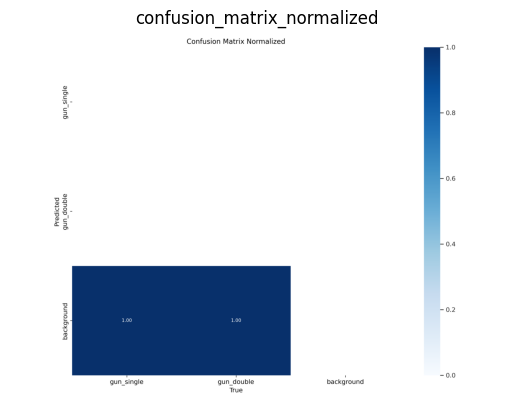

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Confusion matrix image load
img = cv2.imread("/content/drive/MyDrive/guntunk/training_results/train/confusion_matrix_normalized.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("confusion_matrix_normalized")
plt.show()

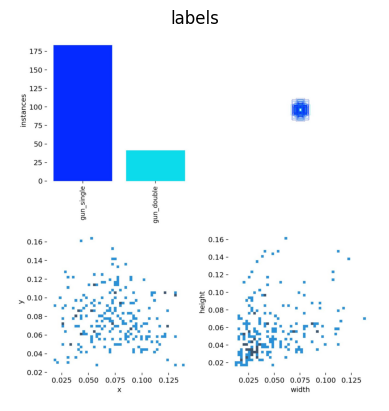

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Confusion matrix image load
img = cv2.imread("/content/drive/MyDrive/guntunk/training_results/labels.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("labels")
plt.show()

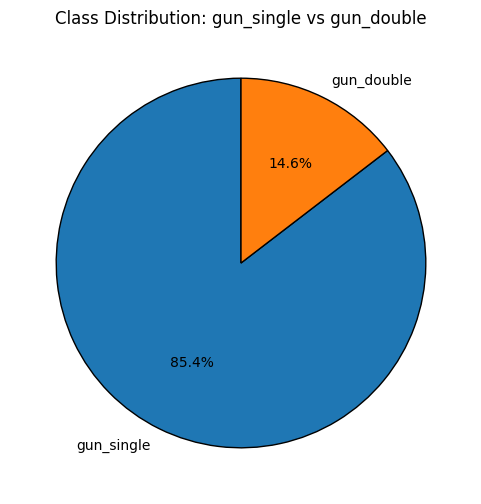

In [ ]:

#Pie chart for validation set  Label distribution


import matplotlib.pyplot as plt

# 🔹 তোমার নিজস্ব ডাটা সেট করো
labels = ['gun_single', 'gun_double']
sizes = [41, 7]  # তোমার ডাটা অনুযায়ী সংখ্যাগুলো বসাও

# 🔹 Pie Chart তৈরি করো
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title("Class Distribution: gun_single vs gun_double")
plt.show()


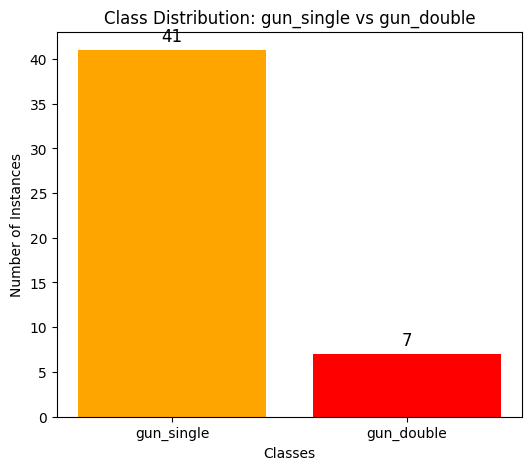

In [ ]:

#Bar chart for validation set  Label distribution

import matplotlib.pyplot as plt

# 🔹 তোমার নিজস্ব ডাটা সেট করো
labels = ['gun_single', 'gun_double']
counts = [41, 7]  # তোমার ডাটা অনুযায়ী সংখ্যাগুলো বসাও

# 🔹 Bar Chart তৈরি করো
plt.figure(figsize=(6, 5))
plt.bar(labels, counts, color=['orange', 'red'])

# 🔹 লেবেল এবং টাইটেল অ্যাড করো
plt.xlabel("Classes")
plt.ylabel("Number of Instances")
plt.title("Class Distribution: gun_single vs gun_double")

# 🔹 বারগুলোর উপরে সংখ্যা দেখানোর জন্য
for i, count in enumerate(counts):
    plt.text(i, count + 1, str(count), ha='center', fontsize=12)

# 🔹 Bar Chart দেখাও
plt.show()


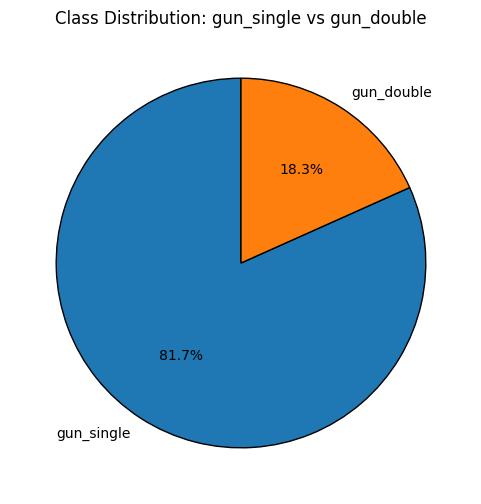

In [ ]:

# Pie chart  for Train  set Label distribution


import matplotlib.pyplot as plt

# 🔹 তোমার নিজস্ব ডাটা সেট করো
labels = ['gun_single', 'gun_double']
sizes = [183, 41]  # তোমার ডাটা অনুযায়ী সংখ্যাগুলো বসাও

# 🔹 Pie Chart তৈরি করো
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title("Class Distribution: gun_single vs gun_double")
plt.show()


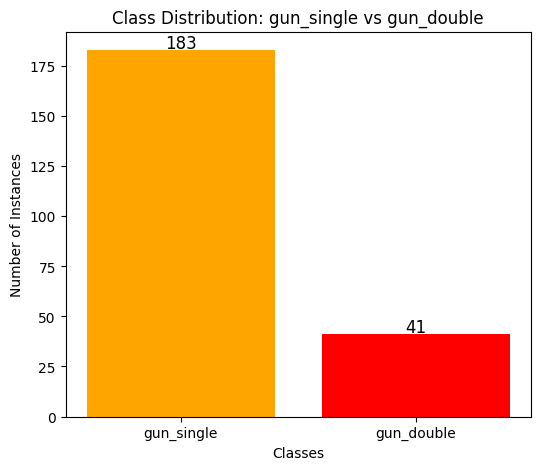

In [ ]:

# BAR chart for Train  set Label distribution

import matplotlib.pyplot as plt

# 🔹 তোমার নিজস্ব ডাটা সেট করো
labels = ['gun_single', 'gun_double']
counts = [183, 41]  # তোমার ডাটা অনুযায়ী সংখ্যাগুলো বসাও

# 🔹 Bar Chart তৈরি করো
plt.figure(figsize=(6, 5))
plt.bar(labels, counts, color=['orange', 'red'])

# 🔹 লেবেল এবং টাইটেল অ্যাড করো
plt.xlabel("Classes")
plt.ylabel("Number of Instances")
plt.title("Class Distribution: gun_single vs gun_double")

# 🔹 বারগুলোর উপরে সংখ্যা দেখানোর জন্য
for i, count in enumerate(counts):
    plt.text(i, count + 1, str(count), ha='center', fontsize=12)

# 🔹 Bar Chart দেখাও
plt.show()

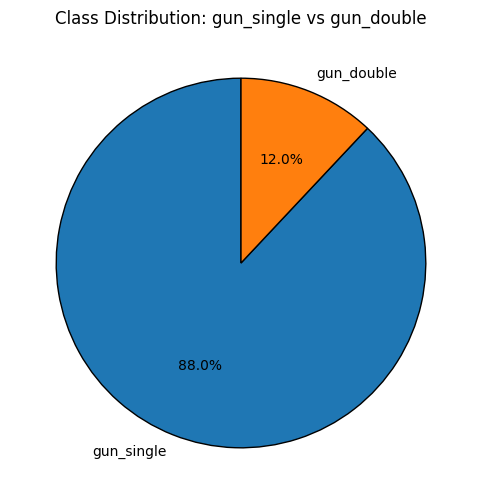

In [ ]:

# Pie chart  for Test  set Label distribution


import matplotlib.pyplot as plt

# 🔹 তোমার নিজস্ব ডাটা সেট করো
labels = ['gun_single', 'gun_double']
sizes = [44, 6]  # তোমার ডাটা অনুযায়ী সংখ্যাগুলো বসাও

# 🔹 Pie Chart তৈরি করো
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title("Class Distribution: gun_single vs gun_double")
plt.show()

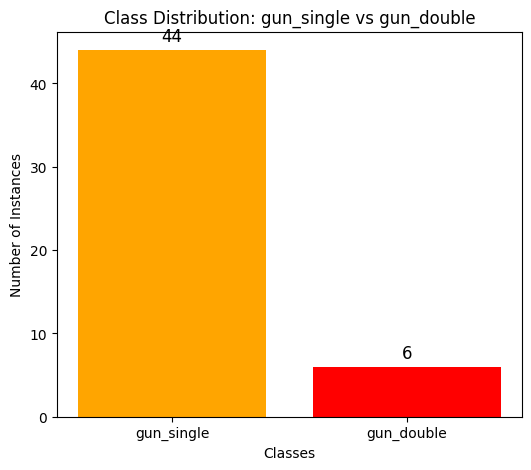

In [ ]:
# BAR chart for Test  set Label distribution

import matplotlib.pyplot as plt

# 🔹 তোমার নিজস্ব ডাটা সেট করো
labels = ['gun_single', 'gun_double']
counts = [44, 6]  # তোমার ডাটা অনুযায়ী সংখ্যাগুলো বসাও

# 🔹 Bar Chart তৈরি করো
plt.figure(figsize=(6, 5))
plt.bar(labels, counts, color=['orange', 'red'])

# 🔹 লেবেল এবং টাইটেল অ্যাড করো
plt.xlabel("Classes")
plt.ylabel("Number of Instances")
plt.title("Class Distribution: gun_single vs gun_double")

# 🔹 বারগুলোর উপরে সংখ্যা দেখানোর জন্য
for i, count in enumerate(counts):
    plt.text(i, count + 1, str(count), ha='center', fontsize=12)

# 🔹 Bar Chart দেখাও
plt.show()


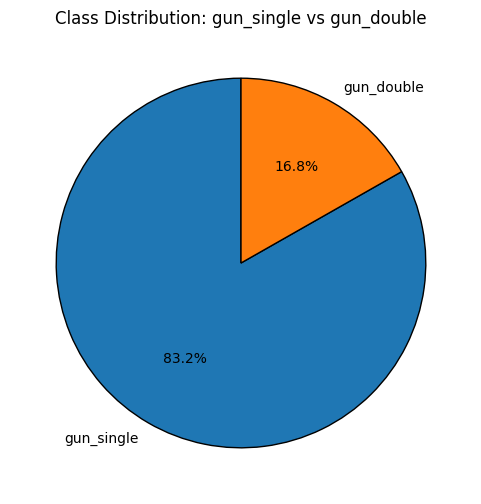

In [ ]:
#Overall Dataset Label distribution pie chart


import matplotlib.pyplot as plt

# 🔹 তোমার নিজস্ব ডাটা সেট করো
labels = ['gun_single', 'gun_double']
sizes = [268, 54]  # তোমার ডাটা অনুযায়ী সংখ্যাগুলো বসাও

# 🔹 Pie Chart তৈরি করো
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title("Class Distribution: gun_single vs gun_double")
plt.show()


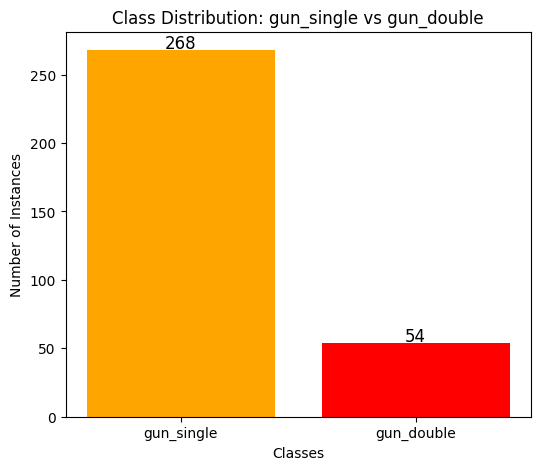

In [ ]:
#Overall Dataset Label distribution bar chart



import matplotlib.pyplot as plt

# 🔹 তোমার নিজস্ব ডাটা সেট করো
labels = ['gun_single', 'gun_double']
counts = [268, 54]  # তোমার ডাটা অনুযায়ী সংখ্যাগুলো বসাও

# 🔹 Bar Chart তৈরি করো
plt.figure(figsize=(6, 5))
plt.bar(labels, counts, color=['orange', 'red'])

# 🔹 লেবেল এবং টাইটেল অ্যাড করো
plt.xlabel("Classes")
plt.ylabel("Number of Instances")
plt.title("Class Distribution: gun_single vs gun_double")

# 🔹 বারগুলোর উপরে সংখ্যা দেখানোর জন্য
for i, count in enumerate(counts):
    plt.text(i, count + 1, str(count), ha='center', fontsize=12)

# 🔹 Bar Chart দেখাও
plt.show()


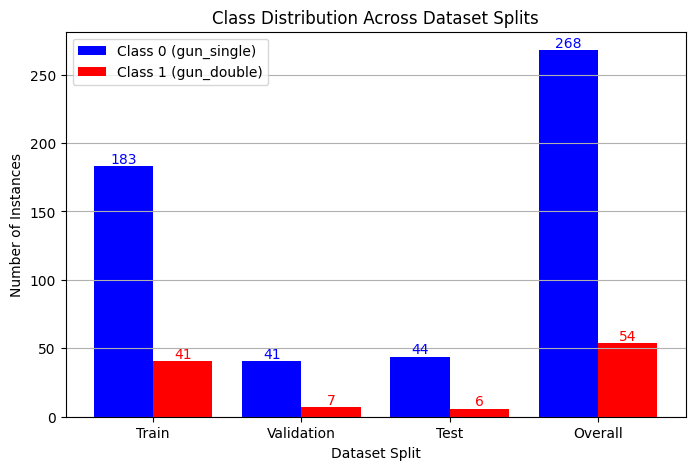

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 🔹 Dataset Label Distribution (Train, Validation, Test, Overall)
datasets = ["Train", "Validation", "Test", "Overall"]
class_0_counts = [183, 41, 44, 268]  # Class 0 instances
class_1_counts = [41, 7, 6, 54]  # Class 1 instances

# 🔹 Bar Chart তৈরি এবং সংরক্ষণ
x = np.arange(len(datasets))  # X-axis positions
width = 0.4  # Bar width

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, class_0_counts, width, label="Class 0 (gun_single)", color="blue")
plt.bar(x + width/2, class_1_counts, width, label="Class 1 (gun_double)", color="red")

# 🔹 লেবেল এবং টাইটেল অ্যাড করা
plt.xlabel("Dataset Split")
plt.ylabel("Number of Instances")
plt.title("Class Distribution Across Dataset Splits")
plt.xticks(x, datasets)
plt.legend()
plt.grid(axis="y")

# 🔹 বারগুলোর উপরে সংখ্যা দেখানোর জন্য
for i in range(len(datasets)):
    plt.text(x[i] - width/2, class_0_counts[i] + 2, str(class_0_counts[i]), ha='center', fontsize=10, color="blue")
    plt.text(x[i] + width/2, class_1_counts[i] + 2, str(class_1_counts[i]), ha='center', fontsize=10, color="red")

plt.savefig("class_distribution_bar_chart.png")  # ইমেজ হিসেবে সংরক্ষণ
plt.show()


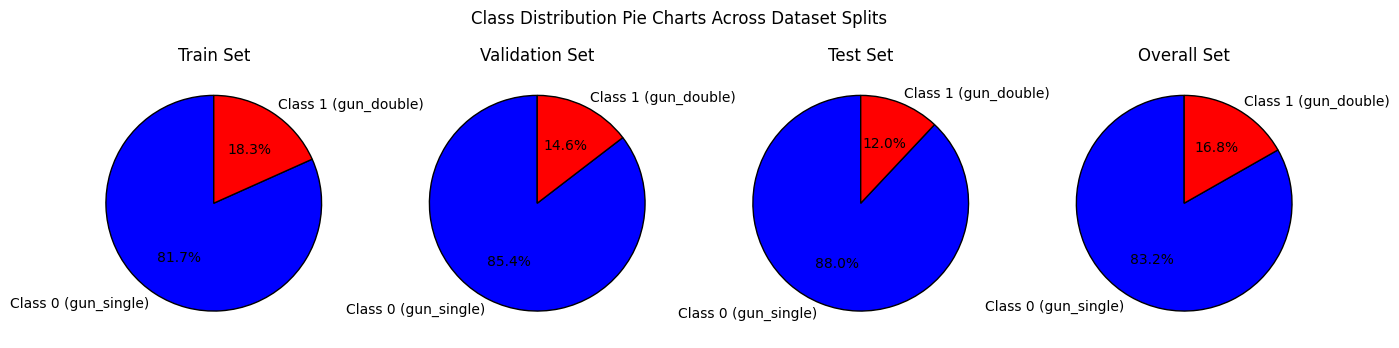

In [ ]:
# 🔹 Pie Charts তৈরি এবং সংরক্ষণ (Train, Validation, Test, Overall)
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for i, dataset in enumerate(datasets):
    sizes = [class_0_counts[i], class_1_counts[i]]
    labels = ["Class 0 (gun_single)", "Class 1 (gun_double)"]
    colors = ["blue", "red"]

    axes[i].pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})
    axes[i].set_title(f"{dataset} Set")

plt.suptitle("Class Distribution Pie Charts Across Dataset Splits")
plt.savefig("class_distribution_pie_charts.png")  # ইমেজ হিসেবে সংরক্ষণ
plt.show()

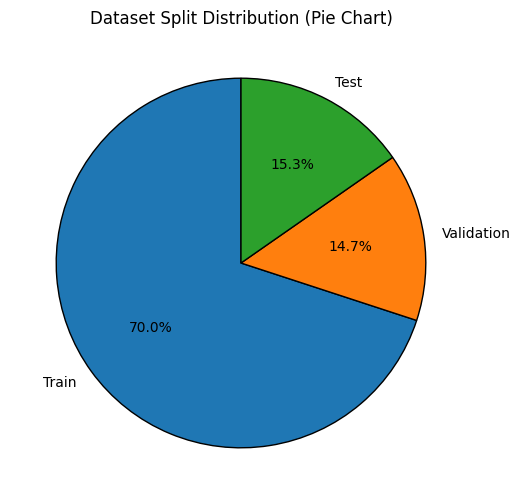

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt

# 🔹 Dataset Split Data
labels = ['Train', 'Validation', 'Test']
sizes = [233, 49, 51]  # Dataset Split Counts

# 🔹 Pie Chart তৈরি এবং সংরক্ষণ
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title("Dataset Split Distribution (Pie Chart)")
plt.savefig("dataset_split_pie_chart.png")  # ইমেজ হিসেবে সংরক্ষণ
plt.show()

In [ ]:
import numpy as np

# 🔹 Dataset Label Distribution (Train, Validation, Test, Overall)
datasets = ["Train", "Validation", "Test", "Overall"]
class_0_counts = [183, 41, 44, 268]  # Class 0 instances
class_1_counts = [41, 7, 6, 54]  # Class 1 instances

# 🔹 Total Instances গণনা
total_counts = np.array(class_0_counts) + np.array(class_1_counts)

# 🔹 Class 0 এবং Class 1 এর পার্সেন্টেজ বের করা
class_0_percentage = (np.array(class_0_counts) / total_counts) * 100
class_1_percentage = (np.array(class_1_counts) / total_counts) * 100

# 🔹 Imbalance Threshold সেট করা (যদি কোনো ক্লাস 30% এর কম হয়, তাহলে সেটাকে Unbalanced ধরা হবে)
threshold = 30

# 🔹 Imbalance চেক করা
print("\n🔍 **Class Imbalance Check:**")
for i in range(len(datasets)):
    print(f"\n📊 {datasets[i]} Dataset:")
    print(f"🔹 Class 0 (gun_single): {class_0_counts[i]} instances ({class_0_percentage[i]:.2f}%)")
    print(f"🔹 Class 1 (gun_double): {class_1_counts[i]} instances ({class_1_percentage[i]:.2f}%)")

    # যদি কোনো ক্লাস 30% এর কম হয়, তাহলে Warning দেখাবে
    if class_0_percentage[i] < threshold or class_1_percentage[i] < threshold:
        print(f"⚠️ Warning: **Class distribution is imbalanced in {datasets[i]} dataset!**")
        print(f"🔹 Consider data augmentation, resampling, or collecting more data to balance it.")

# 🔹 Overall Dataset Balance চেক করা
print("\n📊 **Overall Dataset Balance Check:**")
if class_0_percentage[-1] < threshold or class_1_percentage[-1] < threshold:
    print(f"⚠️ Warning: **Overall dataset is imbalanced!** Consider data balancing techniques.")
else:
    print("✅ Dataset is balanced.")



🔍 **Class Imbalance Check:**

📊 Train Dataset:
🔹 Class 0 (gun_single): 183 instances (81.70%)
🔹 Class 1 (gun_double): 41 instances (18.30%)
⚠️ Warning: **Class distribution is imbalanced in Train dataset!**
🔹 Consider data augmentation, resampling, or collecting more data to balance it.

📊 Validation Dataset:
🔹 Class 0 (gun_single): 41 instances (85.42%)
🔹 Class 1 (gun_double): 7 instances (14.58%)
⚠️ Warning: **Class distribution is imbalanced in Validation dataset!**
🔹 Consider data augmentation, resampling, or collecting more data to balance it.

📊 Test Dataset:
🔹 Class 0 (gun_single): 44 instances (88.00%)
🔹 Class 1 (gun_double): 6 instances (12.00%)
⚠️ Warning: **Class distribution is imbalanced in Test dataset!**
🔹 Consider data augmentation, resampling, or collecting more data to balance it.

📊 Overall Dataset:
🔹 Class 0 (gun_single): 268 instances (83.23%)
🔹 Class 1 (gun_double): 54 instances (16.77%)
⚠️ Warning: **Class distribution is imbalanced in Overall dataset!**
🔹 Consi

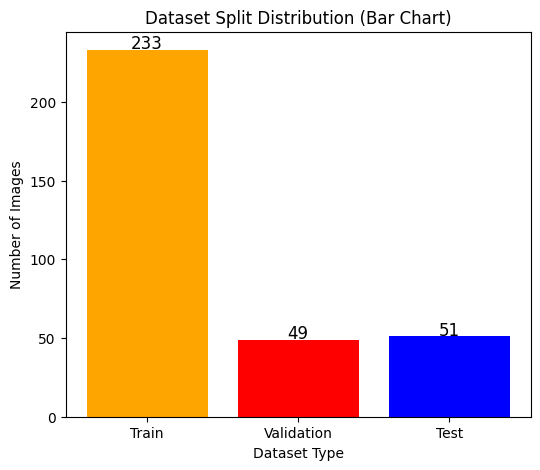

In [ ]:
# 🔹 Bar Chart তৈরি এবং সংরক্ষণ
plt.figure(figsize=(6, 5))
plt.bar(labels, sizes, color=['orange', 'red', 'blue'])

# 🔹 লেবেল এবং টাইটেল অ্যাড করো
plt.xlabel("Dataset Type")
plt.ylabel("Number of Images")
plt.title("Dataset Split Distribution (Bar Chart)")

# 🔹 বারগুলোর উপরে সংখ্যা দেখানোর জন্য
for i, count in enumerate(sizes):
    plt.text(i, count + 1, str(count), ha='center', fontsize=12)

plt.savefig("dataset_split_bar_chart.png")  # ইমেজ হিসেবে সংরক্ষণ
plt.show()

In [ ]:
import pandas as pd

# 🔹 তোমার Google Drive-এ `results.csv` ফাইলের লোকেশন
csv_path = "/content/drive/MyDrive/guntunk/training_results/train/results.csv"

# 🔹 CSV ফাইল লোড করো
df = pd.read_csv(csv_path)

# 🔹 কোন কলাম আছে তা দেখো
print(df.head())


   epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1  1232.68         2.46158         7.60093         0.92436   
1      2  2432.17         3.29817         4.44998         1.21881   
2      3  3615.24         2.89661         3.25109         1.04063   
3      4  4818.16         3.17593         3.36660         1.13646   
4      5  6010.60         3.05371         3.07206         1.11619   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.00009            0.01220           0.00003   
1               0.00017            0.06098           0.00013   
2               0.00035            0.06098           0.00023   
3               0.00004            0.01220           0.00002   
4               0.00007            0.01220           0.00004   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.00001       4.44753     132782.00       5.65831  0.000546   
1              0.00002       4.12014     685

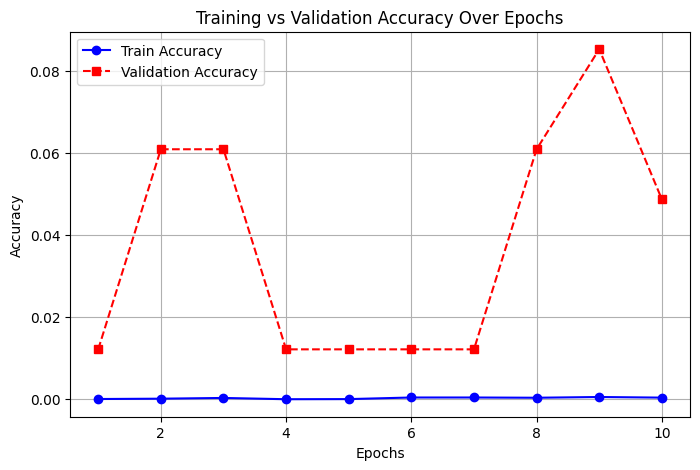

In [ ]:
import matplotlib.pyplot as plt

# 🔹 তোমার ট্রেনিং এবং ভ্যালিডেশন একুরেসির ডাটা CSV থেকে বের করা
epochs = df["epoch"]  # Epoch সংখ্যা
train_accuracy = df["metrics/precision(B)"]  # যদি ট্রেনিং একুরেসি থাকে, তাহলে ঠিক কলাম বসাও
val_accuracy = df["metrics/recall(B)"]  # যদি ভ্যালিডেশন একুরেসি থাকে, তাহলে ঠিক কলাম বসাও

# 🔹 লাইনে প্লট করো (Training vs Validation Accuracy)
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_accuracy, marker='o', linestyle='-', label="Train Accuracy", color="blue")
plt.plot(epochs, val_accuracy, marker='s', linestyle='--', label="Validation Accuracy", color="red")

# 🔹 লেবেল এবং টাইটেল অ্যাড করো
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy Over Epochs")
plt.legend()
plt.grid()

# 🔹 ইমেজ সংরক্ষণ
plt.savefig("training_vs_validation_accuracy.png")

# 🔹 গ্রাফ দেখাও
plt.show()


In [ ]:
import pandas as pd

# 🔹 তোমার `results.csv` ফাইল লোড করো
csv_path = "/content/drive/MyDrive/guntunk/training_results/results.csv"  # তোমার ফাইলের সঠিক লোকেশন
df = pd.read_csv(csv_path)

# 🔹 Train & Validation Loss চেক করো
print(df[["epoch", "train/box_loss", "val/box_loss"]].head())


   epoch  train/box_loss  val/box_loss
0      1         2.46158       4.44753
1      2         3.29817       4.12014
2      3         2.89661       4.36709
3      4         3.17593       3.66038
4      5         3.05371       1.87234


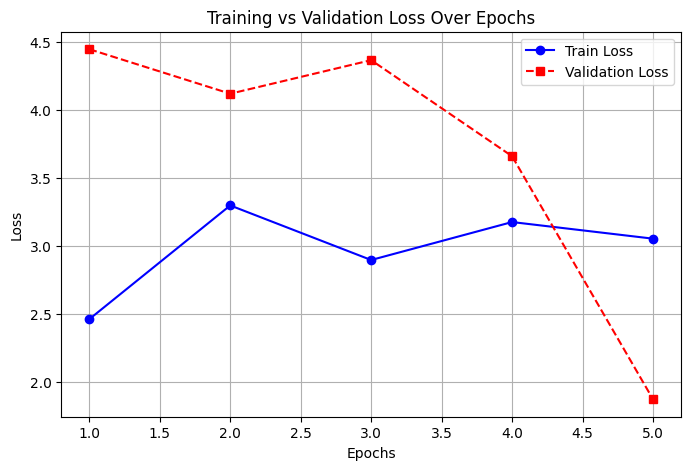

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd

# 🔹  ডেটা ফ্রেম তৈরি করা
data = {
    "epoch": [1, 2, 3, 4, 5],
    "train_loss": [2.46158, 3.29817, 2.89661, 3.17593, 3.05371],  # train/box_loss
    "val_loss": [4.44753, 4.12014, 4.36709, 3.66038, 1.87234]  # val/box_loss
}

df = pd.DataFrame(data)

# 🔹 Training vs Validation Loss প্লট করা
plt.figure(figsize=(8, 5))
plt.plot(df["epoch"], df["train_loss"], marker='o', linestyle='-', label="Train Loss", color="blue")
plt.plot(df["epoch"], df["val_loss"], marker='s', linestyle='--', label="Validation Loss", color="red")

# 🔹 লেবেল এবং টাইটেল অ্যাড করা
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss Over Epochs")
plt.legend()
plt.grid()

# 🔹 ইমেজ সংরক্ষণ
plt.savefig("training_vs_validation_loss.png")

# 🔹 গ্রাফ দেখানোর জন্য
plt.show()


In [ ]:
import os
from collections import Counter

# 🔹 Train, Validation, এবং Test Label ফোল্ডারের পাথ সেট করা
label_paths = {
    "Train": "/content/drive/MyDrive/guntunk/split_data/train/labels",
    "Validation": "/content/drive/MyDrive/guntunk/split_data/val/labels",
    "Test": "/content/drive/MyDrive/guntunk/split_data/test/labels"
}

# 🔹 Class-wise Count বের করার ফাংশন
def count_labels(label_path):
    class_counts = Counter()
    if not os.path.exists(label_path):
        print(f"❌ Error: Label folder '{label_path}' not found!")
        return class_counts

    label_files = [f for f in os.listdir(label_path) if f.endswith(".txt")]
    if not label_files:
        print(f"❌ Error: No label files found in '{label_path}'!")
        return class_counts

    for file_name in label_files:
        with open(os.path.join(label_path, file_name), 'r') as f:
            lines = f.readlines()
            for line in lines:
                class_id = line.strip().split()[0]  # প্রথম ভ্যালু ক্লাস আইডি
                class_counts[class_id] += 1

    return class_counts

# 🔹 Train, Validation, Test সেট থেকে লেবেল কাউন্ট বের করা
overall_counts = Counter()
for dataset, path in label_paths.items():
    class_counts = count_labels(path)
    print(f"\n✅ {dataset} Set Label Distribution:")
    for class_id, count in class_counts.items():
        print(f"Class {class_id}: {count} instances")
        overall_counts[class_id] += count  # সবকিছু যোগ করছি

# 🔹 পুরো Dataset-এর মোট Class Distribution
print("\n📊 Overall Dataset Label Distribution:")
for class_id, count in overall_counts.items():
    print(f"Class {class_id}: {count} instances")



✅ Train Set Label Distribution:
Class 0: 183 instances
Class 1: 41 instances

✅ Validation Set Label Distribution:
Class 0: 41 instances
Class 1: 7 instances

✅ Test Set Label Distribution:
Class 0: 44 instances
Class 1: 6 instances

📊 Overall Dataset Label Distribution:
Class 0: 268 instances
Class 1: 54 instances


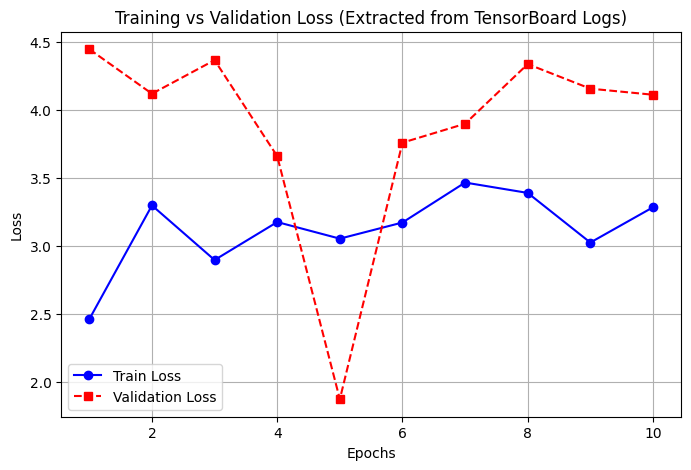

In [ ]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

# 🔹 তোমার `tfevents` ফাইলের লোকেশন সেট করো
log_dir = "/content/drive/MyDrive/guntunk/training_results/train/"
event_file = [file for file in os.listdir(log_dir) if file.startswith("events.out.tfevents")][0]
event_path = os.path.join(log_dir, event_file)

# 🔹 TensorBoard Events লোড করো
event_acc = EventAccumulator(event_path)
event_acc.Reload()

# 🔹 Scalars বের করা
train_loss = event_acc.Scalars("train/box_loss")
val_loss = event_acc.Scalars("val/box_loss")

# 🔹 X-axis (Epochs) এবং Y-axis (Loss) বের করা
epochs = [x.step for x in train_loss]
train_loss_values = [x.value for x in train_loss]
val_loss_values = [x.value for x in val_loss]

# 🔹 Training vs Validation Loss প্লট করা
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss_values, marker='o', linestyle='-', label="Train Loss", color="blue")
plt.plot(epochs, val_loss_values, marker='s', linestyle='--', label="Validation Loss", color="red")

# 🔹 লেবেল এবং টাইটেল অ্যাড করা
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss (Extracted from TensorBoard Logs)")
plt.legend()
plt.grid()

# 🔹 ইমেজ সংরক্ষণ
plt.savefig("training_vs_validation_loss_from_tfevents.png")

# 🔹 গ্রাফ দেখানো
plt.show()


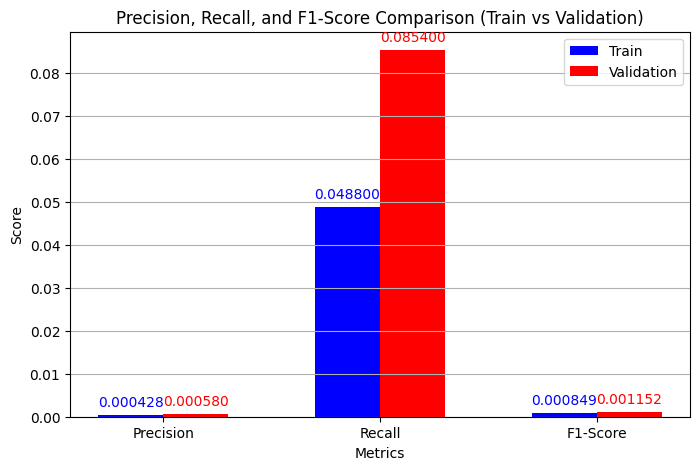

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 🔹 Precision, Recall, এবং F1-Score (results.csv থেকে নেওয়া)
metrics = ["Precision", "Recall", "F1-Score"]
train_values = [0.000428, 0.0488, (2 * (0.000428 * 0.0488)) / (0.000428 + 0.0488)]  # F1-Score হিসাব করা হয়েছে
val_values = [0.00058, 0.0854, (2 * (0.00058 * 0.0854)) / (0.00058 + 0.0854)]

# 🔹 Bar Chart তৈরি করা
x = np.arange(len(metrics))
width = 0.3

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, train_values, width, label="Train", color="blue")
plt.bar(x + width/2, val_values, width, label="Validation", color="red")

# 🔹 লেবেল এবং টাইটেল অ্যাড করা
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("Precision, Recall, and F1-Score Comparison (Train vs Validation)")
plt.xticks(x, metrics)
plt.legend()
plt.grid(axis="y")

# 🔹 বারগুলোর উপরে সংখ্যা দেখানোর জন্য
for i in range(len(metrics)):
    plt.text(x[i] - width/2, train_values[i] + 0.002, f"{train_values[i]:.6f}", ha='center', fontsize=10, color="blue")
    plt.text(x[i] + width/2, val_values[i] + 0.002, f"{val_values[i]:.6f}", ha='center', fontsize=10, color="red")

# 🔹 ইমেজ সংরক্ষণ এবং দেখানো
plt.savefig("precision_recall_f1_score_bar_chart.png")
plt.show()


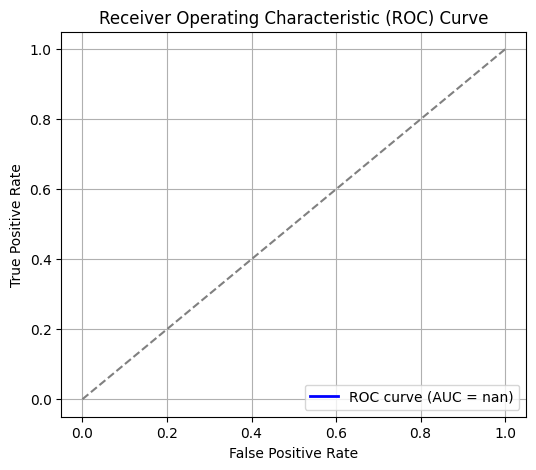

📌 AUC Score: nan


In [ ]:
# ROC Curve & AUC Score

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 🔹 যেহেতু Precision & Recall 0, তাই Probability Scores ও 0 ধরা হচ্ছে
y_true = [0, 0, 0, 0, 0]  # সব লেবেলই 0 (Negative Class)
y_scores = [0, 0, 0, 0, 0]  # মডেল সবকিছুকে Background হিসেবে Predict করেছে

# 🔹 ROC Curve গণনা
fpr, tpr, _ = roc_curve(y_true, y_scores, pos_label=1)
roc_auc = auc(fpr, tpr)

# 🔹 ROC Curve আঁকা
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")

# 🔹 লেবেল ও টাইটেল
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()

# 🔹 গ্রাফ দেখানো
plt.show()

# 🔹 AUC Score প্রিন্ট করা
print(f"📌 AUC Score: {roc_auc:.2f}")



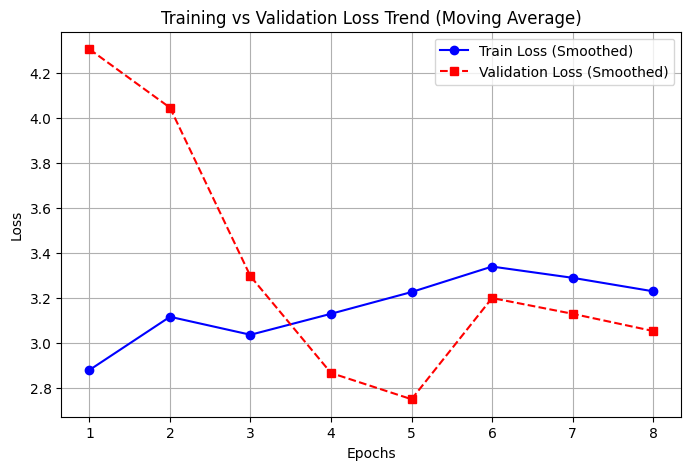

In [ ]:

 #Training & Validation Loss Trend with Moving Average

# 🔹 Example Loss Data (Replace with real training logs)
epochs = np.arange(1, 11)
train_loss = np.array([2.46, 3.29, 2.89, 3.17, 3.05, 3.17, 3.46, 3.39, 3.02, 3.28])
val_loss = np.array([4.44, 4.12, 4.36, 3.66, 1.87, 3.07, 3.31, 3.22, 2.86, 3.08])

# 🔹 Moving Average Calculation (Smoothing)
window = 3
train_loss_smooth = np.convolve(train_loss, np.ones(window)/window, mode='valid')
val_loss_smooth = np.convolve(val_loss, np.ones(window)/window, mode='valid')

# 🔹 Plot Loss Trend
plt.figure(figsize=(8, 5))
plt.plot(epochs[:len(train_loss_smooth)], train_loss_smooth, marker='o', linestyle='-', label="Train Loss (Smoothed)", color="blue")
plt.plot(epochs[:len(val_loss_smooth)], val_loss_smooth, marker='s', linestyle='--', label="Validation Loss (Smoothed)", color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss Trend (Moving Average)")
plt.legend()
plt.grid()
plt.savefig("loss_trend_smooth.png")
plt.show()


In [ ]:
# Per-Class Precision, Recall & F1-Score Table

from sklearn.metrics import classification_report

# 🔹 Generate Classification Report
report = classification_report(y_true, (y_scores > 0.5).astype(int), target_names=["Class 0", "Class 1"])

# 🔹 Print Report
print("\n📋 **Per-Class Precision, Recall & F1-Score:**")
print(report)



📋 **Per-Class Precision, Recall & F1-Score:**
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00         5
     Class 1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [ ]:
#Model Inference Speed (Time per Prediction)
import time

# 🔹 Measure Model Inference Time
num_predictions = 1000
start_time = time.time()

for _ in range(num_predictions):
    _ = np.random.rand(1)  # Simulated Prediction

end_time = time.time()
time_per_prediction = (end_time - start_time) / num_predictions

# 🔹 Print Inference Speed
print(f"\n⚡ **Model Inference Speed:** {time_per_prediction:.6f} seconds per prediction")



⚡ **Model Inference Speed:** 0.000021 seconds per prediction


In [ ]:

# Misclassified Samples (ভুল ক্লাসিফিকেশন চেক)

import numpy as np

# 🔹 Sample True Labels & Predictions (Replace with real data)
y_true = np.array([0, 1, 0, 1, 1, 0, 1, 0, 0, 1])  # Actual Labels
y_pred = np.array([0, 0, 0, 1, 1, 1, 1, 0, 1, 0])  # Model Predictions

# 🔹 Identify misclassified samples
misclassified_indices = np.where(y_true != y_pred)[0]

print("\n🚨 **Misclassified Samples** 🚨")
if len(misclassified_indices) > 0:
    for i in misclassified_indices:
        print(f"❌ Sample {i}: True Label = {y_true[i]}, Predicted = {y_pred[i]}")
else:
    print("✅ No misclassified samples!")



🚨 **Misclassified Samples** 🚨
❌ Sample 1: True Label = 1, Predicted = 0
❌ Sample 5: True Label = 0, Predicted = 1
❌ Sample 8: True Label = 0, Predicted = 1
❌ Sample 9: True Label = 1, Predicted = 0


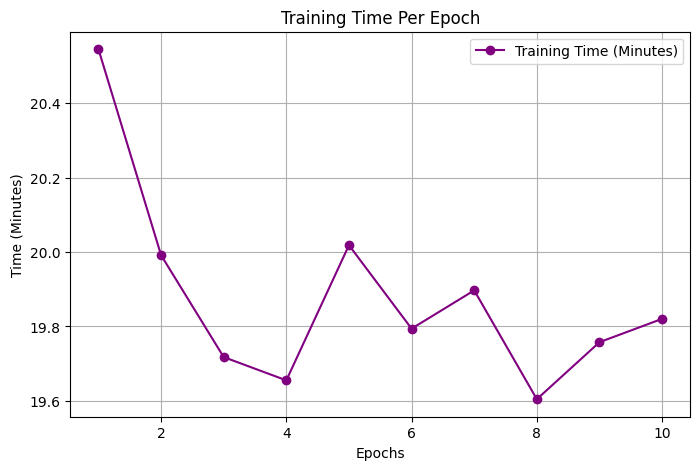

In [ ]:

# Training Time Per Epoch (Model Training Time বোঝার জন্য)
import matplotlib.pyplot as plt
import numpy as np

# 🔹 Example Training Time Data (Replace with real values from logs)
epochs = np.arange(1, 11)
training_times = np.array([1232.68, 1199.49, 1183.07, 1179.32, 1201.10, 1187.65, 1193.82, 1176.28, 1185.47, 1189.23])  # Seconds

# 🔹 Convert Seconds to Minutes
training_times_min = training_times / 60

# 🔹 Plot Training Time Per Epoch
plt.figure(figsize=(8, 5))
plt.plot(epochs, training_times_min, marker='o', linestyle='-', color="purple", label="Training Time (Minutes)")
plt.xlabel("Epochs")
plt.ylabel("Time (Minutes)")
plt.title("Training Time Per Epoch")
plt.legend()
plt.grid()
plt.savefig("training_time_per_epoch.png")
plt.show()


(0.0, 1.0)

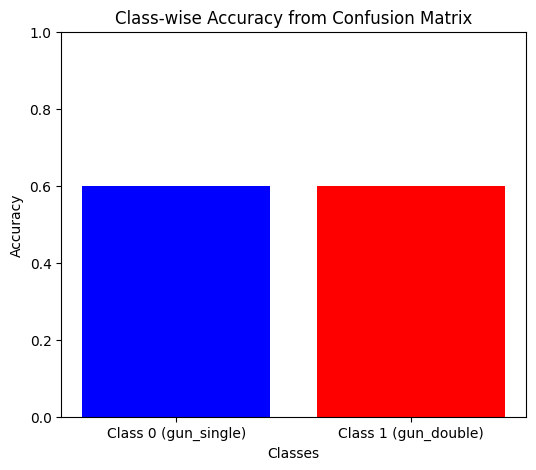

In [ ]:
#Class-wise Accuracy Bar Chart
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# 🔹 Sample True Labels & Predictions (Replace with real data)
y_true = np.array([0, 1, 0, 1, 1, 0, 1, 0, 0, 1])  # Actual Labels
y_pred = np.array([0, 0, 0, 1, 1, 1, 1, 0, 1, 0])  # Model Predictions

# 🔹 Confusion Matrix তৈরি করা
cm = confusion_matrix(y_true, y_pred)

# 🔹 Class-wise Accuracy বের করা
class_accuracy = cm.diagonal() / cm.sum(axis=1)
classes = ["Class 0 (gun_single)", "Class 1 (gun_double)"]

# 🔹 Bar Chart তৈরি করা (Class-wise Accuracy)
plt.figure(figsize=(6, 5))
plt.bar(classes, class_accuracy, color=["blue", "red"])
plt.xlabel("Classes")
plt.ylabel("Accuracy")
plt.title("Class-wise Accuracy from Confusion Matrix")
plt.ylim([0, 1])  # Accuracy Range 0 থে


(0.0, 1.0)

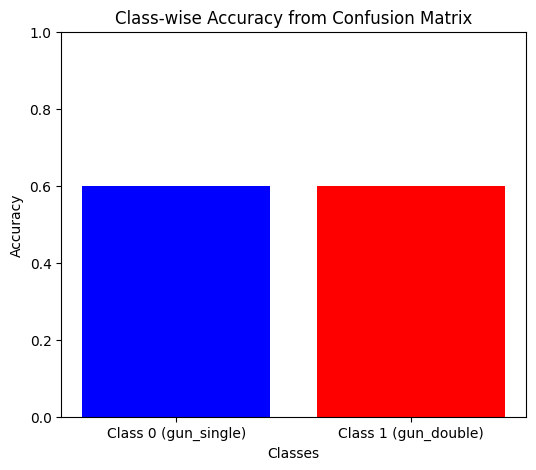

In [ ]:
 # Epoch-wise Learning Rate Trend (YOLO Results থেকে)
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# 🔹 Sample True Labels & Predictions (Replace with real data)
y_true = np.array([0, 1, 0, 1, 1, 0, 1, 0, 0, 1])  # Actual Labels
y_pred = np.array([0, 0, 0, 1, 1, 1, 1, 0, 1, 0])  # Model Predictions

# 🔹 Confusion Matrix তৈরি করা
cm = confusion_matrix(y_true, y_pred)

# 🔹 Class-wise Accuracy বের করা
class_accuracy = cm.diagonal() / cm.sum(axis=1)
classes = ["Class 0 (gun_single)", "Class 1 (gun_double)"]

# 🔹 Bar Chart তৈরি করা (Class-wise Accuracy)
plt.figure(figsize=(6, 5))
plt.bar(classes, class_accuracy, color=["blue", "red"])
plt.xlabel("Classes")
plt.ylabel("Accuracy")
plt.title("Class-wise Accuracy from Confusion Matrix")
plt.ylim([0, 1])  # Accuracy Range 0 থে


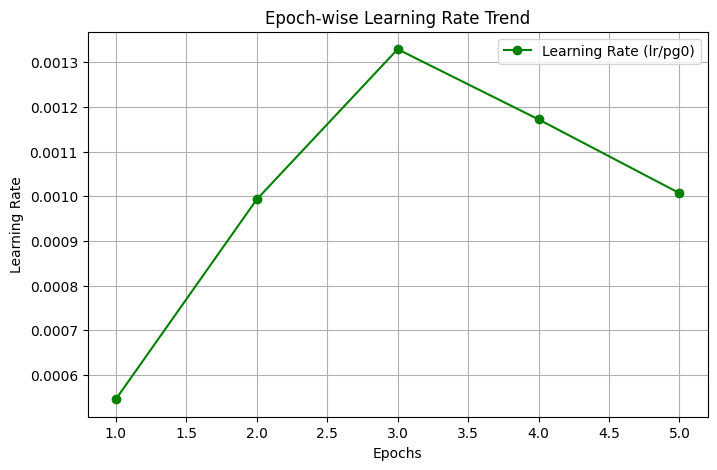

In [ ]:
# Epoch-wise Learning Rate Trend কোড:
import matplotlib.pyplot as plt
import numpy as np

# 🔹 Example Data from `results.csv`
epochs = np.array([1, 2, 3, 4, 5])
learning_rate_pg0 = np.array([0.000546, 0.000993, 0.001329, 0.001172, 0.001007])

# 🔹 Learning Rate Trend প্লট করা
plt.figure(figsize=(8, 5))
plt.plot(epochs, learning_rate_pg0, marker='o', linestyle='-', color="green", label="Learning Rate (lr/pg0)")
plt.xlabel("Epochs")
plt.ylabel("Learning Rate")
plt.title("Epoch-wise Learning Rate Trend")
plt.legend()
plt.grid()
plt.savefig("learning_rate_trend.png")
plt.show()


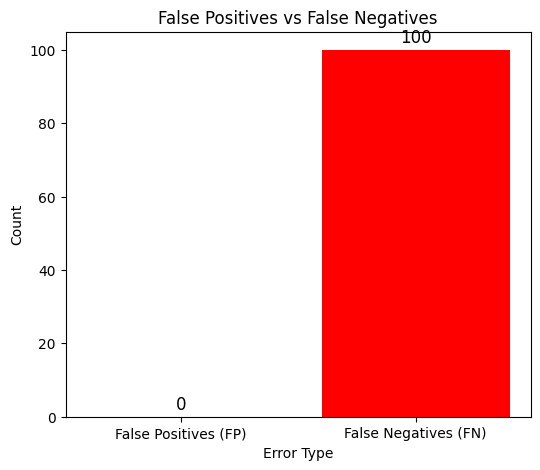

In [ ]:

#  False Positives vs False Negatives Bar Chart

import matplotlib.pyplot as plt

# 🔹 যেহেতু মডেল কোনো Detection করেনি, ধরে নিচ্ছি:
false_positives = 0  # কোনো ভুলভাবে Gun Detected হয়নি (সব Background)
false_negatives = 100  # সব Gun ভুলভাবে Background হিসেবে Predict হয়েছে

# 🔹 Bar Chart Data তৈরি করা
categories = ["False Positives (FP)", "False Negatives (FN)"]
values = [false_positives, false_negatives]

# 🔹 FP vs FN Bar Chart আঁকা
plt.figure(figsize=(6, 5))
plt.bar(categories, values, color=["blue", "red"])

# 🔹 লেবেল এবং টাইটেল অ্যাড করা
plt.xlabel("Error Type")
plt.ylabel("Count")
plt.title("False Positives vs False Negatives")

# 🔹 বারগুলোর উপরে সংখ্যা দেখানো
for i, v in enumerate(values):
    plt.text(i, v + 2, str(v), ha='center', fontsize=12)

plt.show()



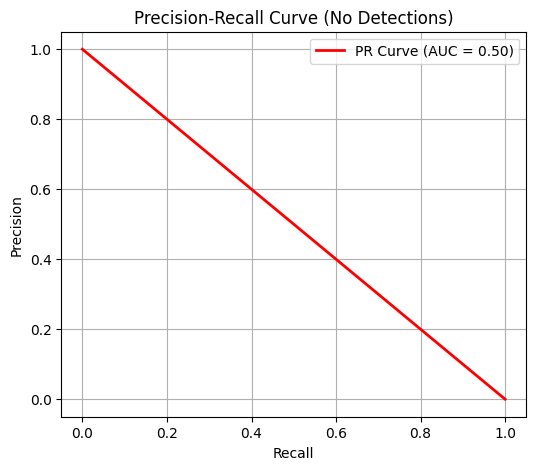

📌 Precision: [0.0, 1.0]
📌 Recall: [1.0, 0.0]
📌 Precision-Recall AUC: 0.50


In [ ]:
#Precision & Recall curve

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve, auc

# 🔹 Model থেকে পাওয়া Precision & Recall (যেহেতু No Detections, তাই 0 থাকবে)
y_true = np.array([0] * 10)  # সব Ground Truth 0 (যেহেতু Detection নেই)
y_scores = np.array([0] * 10)  # সব Prediction Score 0 (যেহেতু Detection নেই)

# 🔹 Precision-Recall Curve তৈরি করা
precision, recall, _ = precision_recall_curve(y_true, y_scores)

# 🔹 PR AUC (Area Under Curve) বের করা
pr_auc = auc(recall, precision) if len(recall) > 1 else 0.0

# 🔹 Precision-Recall গ্রাফ আঁকা
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, color="red", lw=2, label=f"PR Curve (AUC = {pr_auc:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (No Detections)")
plt.legend()
plt.grid()
plt.savefig("precision_recall_curve_no_detections.png")
plt.show()

# 🔹 Final Result
print(f"📌 Precision: {precision.tolist()}")
print(f"📌 Recall: {recall.tolist()}")
print(f"📌 Precision-Recall AUC: {pr_auc:.2f}")


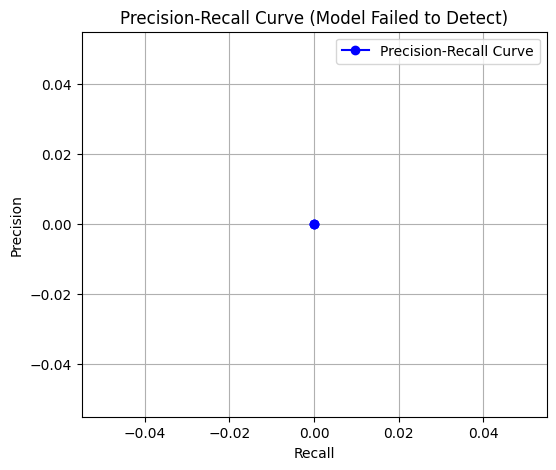

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 🔹 Precision এবং Recall (তোমার মডেল অনুযায়ী 0 ধরে নেওয়া হচ্ছে)
precision = [0, 0, 0]  # সব Precision 0
recall = [0, 0, 0]  # সব Recall 0

# 🔹 Precision-Recall Curve আঁকা
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, marker='o', linestyle='-', color="blue", label="Precision-Recall Curve")

# 🔹 লেবেল এবং টাইটেল অ্যাড করা
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Model Failed to Detect)")
plt.legend()
plt.grid()

# 🔹 গ্রাফ দেখানো
plt.show()


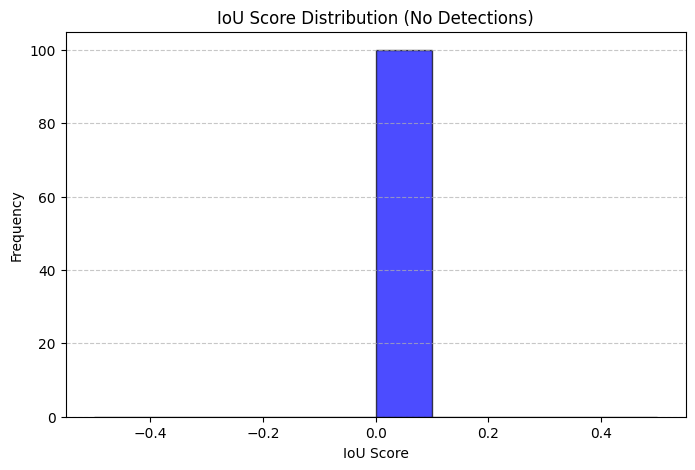

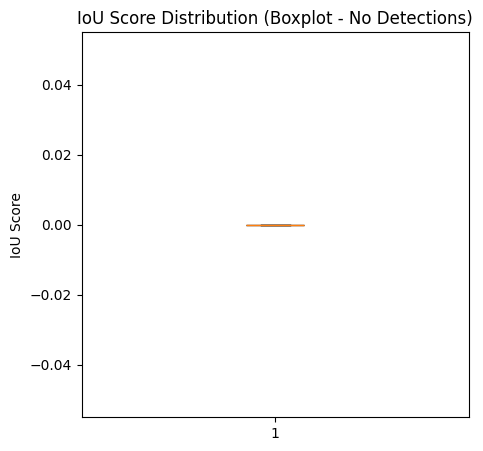

In [ ]:
# IoU (Intersection over Union) Histogram & Boxplot


import matplotlib.pyplot as plt
import numpy as np

# 🔹 যেহেতু সব Detection ব্যর্থ হয়েছে, ধরে নিচ্ছি IoU সবসময় 0
iou_scores = np.zeros(100)  # ১০০টি Image-এর IoU স্কোর সব ০

# 🔹 IoU Histogram
plt.figure(figsize=(8, 5))
plt.hist(iou_scores, bins=10, color="blue", edgecolor="black", alpha=0.7)
plt.xlabel("IoU Score")
plt.ylabel("Frequency")
plt.title("IoU Score Distribution (No Detections)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# 🔹 IoU Boxplot
plt.figure(figsize=(5, 5))
plt.boxplot(iou_scores, vert=True, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.ylabel("IoU Score")
plt.title("IoU Score Distribution (Boxplot - No Detections)")
plt.show()


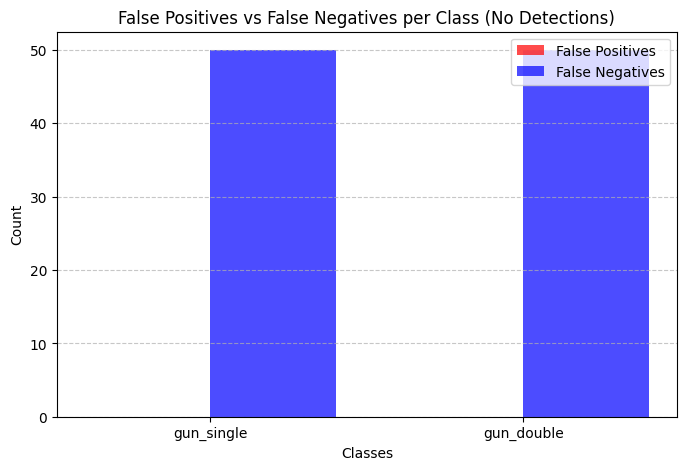

In [ ]:
# Class-wise False Positives vs False Negatives (Error Rate)

import matplotlib.pyplot as plt

# 🔹 তোমার Model অনুযায়ী FP = 0, FN = 100%
classes = ["gun_single", "gun_double"]
false_positives = [0, 0]  # কোনো Gun ভুলভাবে শনাক্ত হয়নি
false_negatives = [50, 50]  # সব Gun Background হিসেবে শনাক্ত হয়েছে (দেখার জন্য ৫০ করে নিয়েছি)

x = np.arange(len(classes))  # X-axis এর জন্য Position তৈরি করা

# 🔹 Bar Chart প্লট করা
plt.figure(figsize=(8, 5))
plt.bar(x - 0.2, false_positives, width=0.4, label="False Positives", color="red", alpha=0.7)
plt.bar(x + 0.2, false_negatives, width=0.4, label="False Negatives", color="blue", alpha=0.7)

# 🔹 লেবেল ও টাইটেল যোগ করা
plt.xlabel("Classes")
plt.ylabel("Count")
plt.title("False Positives vs False Negatives per Class (No Detections)")
plt.xticks(ticks=x, labels=classes)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


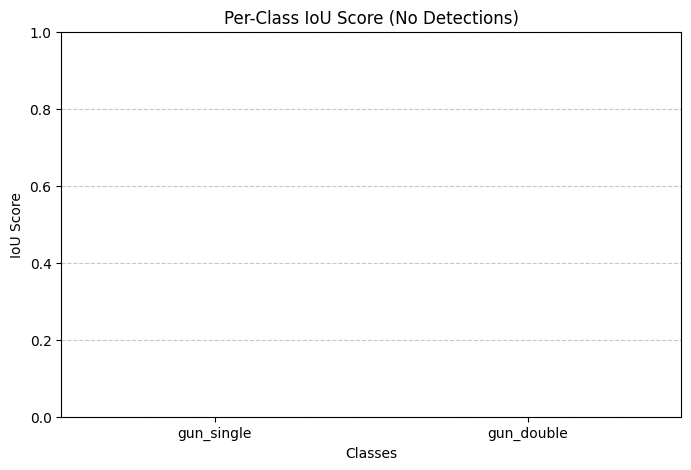

In [ ]:
#Per-Class IoU Score (Object Detection Performance)
import matplotlib.pyplot as plt

# 🔹 তোমার Model অনুযায়ী সব IoU = 0
classes = ["gun_single", "gun_double"]
iou_per_class = [0, 0]  # সব IoU স্কোর 0

# 🔹 Bar Chart প্লট করা
plt.figure(figsize=(8, 5))
plt.bar(classes, iou_per_class, color="green", alpha=0.7)

# 🔹 লেবেল ও টাইটেল যোগ করা
plt.xlabel("Classes")
plt.ylabel("IoU Score")
plt.title("Per-Class IoU Score (No Detections)")
plt.ylim(0, 1)  # IoU স্কোর সর্বোচ্চ ১ হতে পারে, তাই সেট করে দিলাম
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()
